<a href="https://colab.research.google.com/github/K0900/Simulacion/blob/main/Unidad3/Programa7_Distribuci%C3%B3n_Poisson_y_exponencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion
## Unidad 3
### Programa 7. Distribución Poisson y exponencial

Maestro: Rodriguez Rivas Jose Gabriel

Alumno: Gonzalez Frias Camila

Llegadas simuladas por hora:
[11, 8, 11, 6, 7, 13, 8, 12, 8, 14, 5, 7, 9, 7, 15, 19, 16, 8, 7, 11, 7, 7, 9, 10, 11, 9, 6, 8, 11, 10, 13, 11, 9, 10, 14, 11, 5, 15, 15, 10, 9, 14, 11, 8, 11, 9, 10, 10, 7, 5, 17, 15, 10, 12, 6, 9, 11, 7, 15, 8, 4, 8, 11, 17, 10, 11, 4, 13, 11, 12, 12, 8, 10, 8, 12, 11, 10, 15, 8, 11, 12, 7, 5, 8, 10, 8, 9, 10, 10, 10, 8, 7, 7, 9, 8, 10, 16, 7, 7, 14, 13, 11, 7, 10, 13, 14, 14, 9, 8, 8, 9, 8, 9, 9, 6, 5, 12, 14, 8, 13, 6, 12, 8, 5, 13, 9, 8, 8, 10, 9, 13, 7, 13, 8, 6, 7, 9, 16, 10, 12, 6, 9, 5, 11, 9, 9, 14, 7, 14, 5, 13, 13, 12, 13, 8, 9, 7, 12, 8, 14, 7, 4, 11, 15, 7, 9, 7, 11, 9, 5, 10, 11, 8, 12, 13, 9, 11, 11, 12, 6, 11, 11, 15, 7, 15, 11, 12, 11, 11, 13, 10, 9, 12, 9, 15, 7, 8, 6, 8, 14, 10, 14, 6, 15, 13, 16, 8, 9, 15, 8, 16, 9, 12, 13, 12, 14, 9, 13, 8, 8, 8, 9, 9, 11, 9, 8, 14, 11, 9, 10, 13, 10, 2, 12, 10, 6, 9, 13, 8, 9, 13, 16, 14, 8, 15, 3, 4, 12, 13, 12, 10, 15, 8, 12, 8, 13, 7, 9, 8, 10, 8, 8, 13, 4, 11, 7, 11, 9, 6, 11, 10, 13, 12, 6, 16, 1

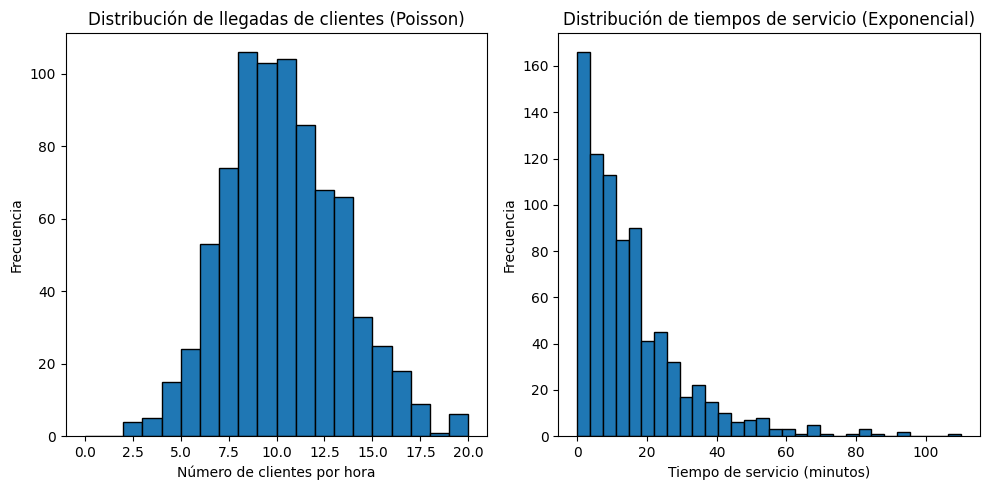

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

lambda_llegadas = 10
tiempo_servicio_promedio = 15
lambda_servicio = 1 / tiempo_servicio_promedio

def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1

def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

num_horas = 8
num_simulaciones = 100
llegadas_simuladas = []
servicios_simulados = []

for _ in range(num_horas):
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

print("Llegadas simuladas por hora:")
print(llegadas_simuladas)

print("Tiempos de servicio (en minutos) simulados:")
print(servicios_simulados)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.hist(llegadas_simuladas, bins=range(0, max(llegadas_simuladas)+1), edgecolor='black')
plt.title("Distribución de llegadas de clientes (Poisson)")
plt.xlabel("Número de clientes por hora")
plt.ylabel("Frecuencia")
plt.subplot(1, 2, 2)
plt.hist(servicios_simulados, bins=30, edgecolor='black')
plt.title("Distribución de tiempos de servicio (Exponencial)")
plt.xlabel("Tiempo de servicio (minutos)")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

Estas distribuciones permiten modelar la aleatoriedad de manera realista ya que los clientes no llegan en intervalos exactos y los tiempos de servicio varían entre clientes, también ayuda a predecir el rendimiento del sistema estimando, cuántos clientes pueden ser atendidos en un periodo, calculando la probabilidad de filas largas en horas pico. Además facilita la optimización de recursos permitiendo determinar cuántos empleados o cajas registradoras son necesarias sin gastar de más.